In [1]:
import os
os.chdir('..')

import pandas as pd
import matplotlib.pyplot as plt

from scripts.crash_data_analysis import CrashDataAnalysis
cda = CrashDataAnalysis()

In [2]:
# df = pd.read_csv('data/crash_data_raw.csv', low_memory=False)

# df.groupby('LIGHT_CONDITION').size()

# df['day_or_night'] = df.LIGHT_CONDITION.map({
#     '  ': 'Unknown'
#     , 'DARK-LIGHTED': 'Night'
#     , 'DARK-UNLIGHTED': 'Night'
#     , 'DAWN OR DUSK': 'Night'
#     , 'DAY LIGHT': 'Day'
#     , 'Dark-Lighted': 'Night'
#     , 'Dark-Unlighted': 'Night'
#     , 'Dawn or Dusk': 'Night'
#     , 'Daylight': 'Day'
#     , 'UNDER INVESTIGATION': 'Unknown'
# })

# df.groupby(['day_or_night', 'LIGHT_CONDITION']).size()

In [3]:
# Aggregate fatality crashes by year and day of year

# to_char(reported_date, 'YYYY-MM') as year_month

query = """
select
crash_year
, day_or_night
, count(*) as num_crashes
, sum(fatality::int) as deadly_crashes
, sum(case when pedestrian_ind > 0 then 1 else 0 end) as pedestrian_involved_crash
, sum(case when bicycle_ind > 0 then 1 else 0 end) as bicycle_involved_crash
, sum(case when fatality and pedestrian_ind > 0 then 1 else 0 end) as pedestrian_involved_fatality
, sum(case when fatality and bicycle_ind > 0 then 1 else 0 end) as bicycle_involved_fatality

from crashes

group by 1,2
order by 1,2
"""

crashes_by_year_month_long = pd.read_sql(query, cda.conn)

In [4]:
crashes_by_year_month_long

,crash_year,day_or_night,num_crashes,deadly_crashes,pedestrian_involved_crash,bicycle_involved_crash,pedestrian_involved_fatality,bicycle_involved_fatality
0,2013,Day,14766,16,316,239,3,0
1,2013,Night,6369,26,207,80,12,0
2,2013,Unknown,482,0,0,2,0,0
3,2014,Day,15896,17,294,238,4,1
4,2014,Night,6778,30,204,91,12,3
5,2014,Unknown,435,1,2,1,0,0
6,2015,Day,17139,26,325,265,4,2
7,2015,Night,7268,28,203,79,9,0
8,2015,Unknown,389,0,0,1,0,0
9,2016,Day,17851,19,330,240,3,2


In [5]:
crashes_day_night = pd.pivot_table(
    data=crashes_by_year_month_long
    , columns='day_or_night'
    , index='crash_year'
    , values='deadly_crashes'
    , aggfunc=sum
    , fill_value=0
)
crashes_day_night

day_or_night,Day,Night,Unknown
crash_year,,,
2013,16,26,0
2014,17,30,1
2015,26,28,0
2016,19,37,0
2017,22,27,1
2018,25,36,1
2019,26,35,2
2020,22,32,0
2021,27,47,2


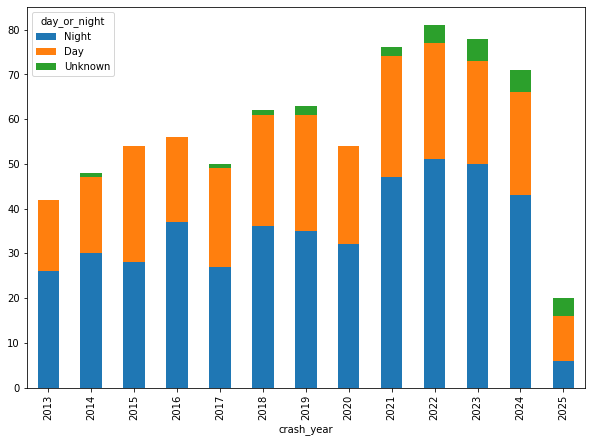

In [10]:
fig, ax = plt.subplots(figsize=(10,7))

_ = crashes_day_night[['Night', 'Day', 'Unknown']].plot(kind='bar', stacked=True, ax=ax)

In [11]:
crashes_day_night['Total'] = crashes_day_night['Day'] + crashes_day_night['Night'] + crashes_day_night['Unknown']

crashes_day_night_perc = crashes_day_night.div(crashes_day_night['Total'], axis='index')
crashes_day_night_perc

day_or_night,Day,Night,Unknown,Total
crash_year,,,,
2013,0.380952,0.619048,0.000000,1.0
2014,0.354167,0.625000,0.020833,1.0
2015,0.481481,0.518519,0.000000,1.0
2016,0.339286,0.660714,0.000000,1.0
2017,0.440000,0.540000,0.020000,1.0
2018,0.403226,0.580645,0.016129,1.0
2019,0.412698,0.555556,0.031746,1.0
2020,0.407407,0.592593,0.000000,1.0
2021,0.355263,0.618421,0.026316,1.0


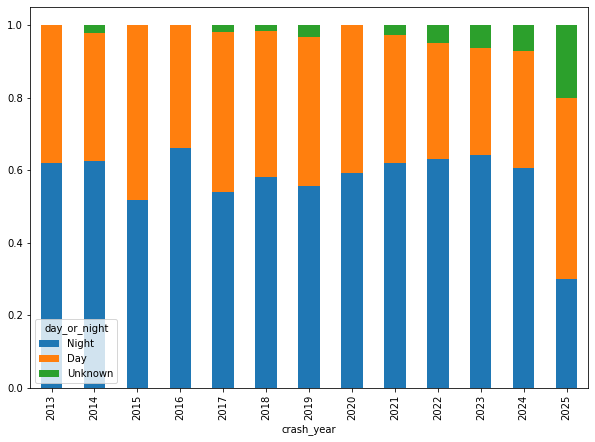

In [9]:
fig, ax = plt.subplots(figsize=(10,7))

_ = crashes_day_night_perc[['Night', 'Day', 'Unknown']].plot(kind='bar', stacked=True, ax=ax)